# importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## reading the datas-wholesale data

In [2]:
raw_data=pd.read_csv('Wholesale customers data.csv')

In [3]:
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data_heads=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

## processing the datas

In [32]:
data_as_numpy=[]
for i in data_heads:
    sample=[]
    for j in range(440):
        sample.append(raw_data[i][j])
    data_as_numpy.append(sample)
for i in range(len(data_heads)):
    data_as_numpy[i]/=np.max(data_as_numpy[i])
    
data_as_numpy=np.transpose(np.array(data_as_numpy))


## applying the  k means algorithm

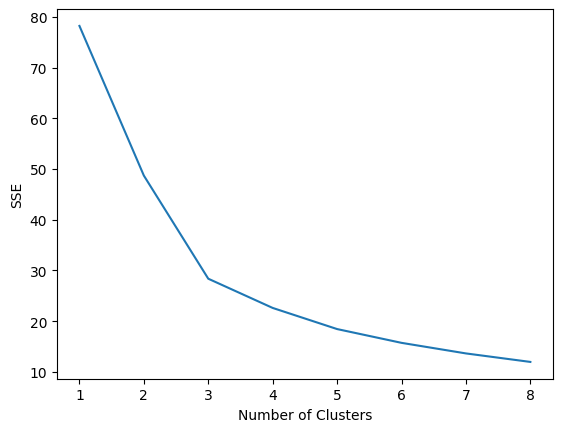

In [36]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_as_numpy)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 9), sse)
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## obtaing the groups

In [38]:
kmeans=KMeans(n_clusters=3)
ypredict_3=kmeans.fit_predict(data_as_numpy)
ypredict_3.reshape((440,1))
print(np.shape(ypredict_3))
kmeans=KMeans(n_clusters=5)
ypredict_5=kmeans.fit_predict(data_as_numpy)
print(np.shape(ypredict_5))

(440,)
(440,)


## iris data

In [41]:
raw_data=pd.read_csv('IRIS.csv')
sl=np.array(raw_data['sepal_length'])
sw=np.array(raw_data['sepal_width'])
pl=np.array(raw_data['petal_length'])
pw=np.array(raw_data['petal_width'])
data=[[sl[i]/np.max(sl),sw[i]/np.max(sw),pl[i]/np.max(pl),pw[i]/np.max(pw)] for i in range(150)]
data=np.array(data)

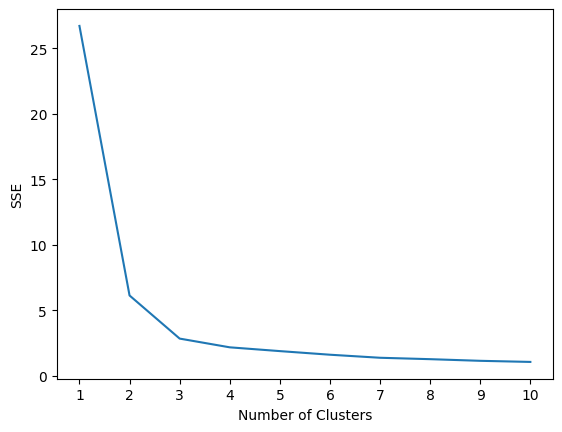

In [42]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()